In [1]:
!pip install python-igraph
!pip install pycairo
!pip install networkx[default]


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import csv 
import pandas as pd
from igraph import *
import cairo
import networkx as nx
import matplotlib.pyplot as plt

In [60]:
rows=[]

# Modify here the path to the .csv file
path = "samples_adriano/myOutput2G-01.csv"
with open(path, newline='') as f:
    csvreader = csv.reader(f)
    next(csvreader)
    for row in csvreader:
        if not row:
            break
        rows.append(row)
df = pd.DataFrame(rows[1:], columns=rows[0])

In [61]:
# Plotting using igraph

g = Graph()
g
g.add_vertices(len(df)+1)
for i in range(len(g.vs)):
    g.vs[i]["id"]= i
    if i == 0:
        g.vs[i]["label"] = "My PC"
        g.vs[i]["color"] = "red"
    else:
        g.vs[i]["label"]= (df.iloc[i-1,0], df.iloc[i-1,-2])
        g.vs[i]["color"] = "blue"

edges = []
for i in range(len(df)):
    edges.append((0,i+1))

g.add_edges(edges)

weights = []
weights_dist = []
for i in range(len(df)):
    weights_dist.append(100/(int(df.iloc[i,8])*-1))
    weights.append((int(df.iloc[i,8])*-1))
g.es['weight'] = weights_dist
g.es['label'] = weights



visual_style = {}
out_name = "graph2.png"

visual_style["bbox"] = (8000,8000)
visual_style["vertex_dist"] = weights
visual_style["vertex_size"] = 15
visual_style["vertex_label_size"] = 15
visual_style["edge_show_label"] = True
visual_style["edge_curved"] = False

my_layout = g.layout_fruchterman_reingold(weights=g.es['weight'])
visual_style["layout"] = my_layout

plot(g, out_name, **visual_style)
print("Fig saved")

Fig saved


Fig saved


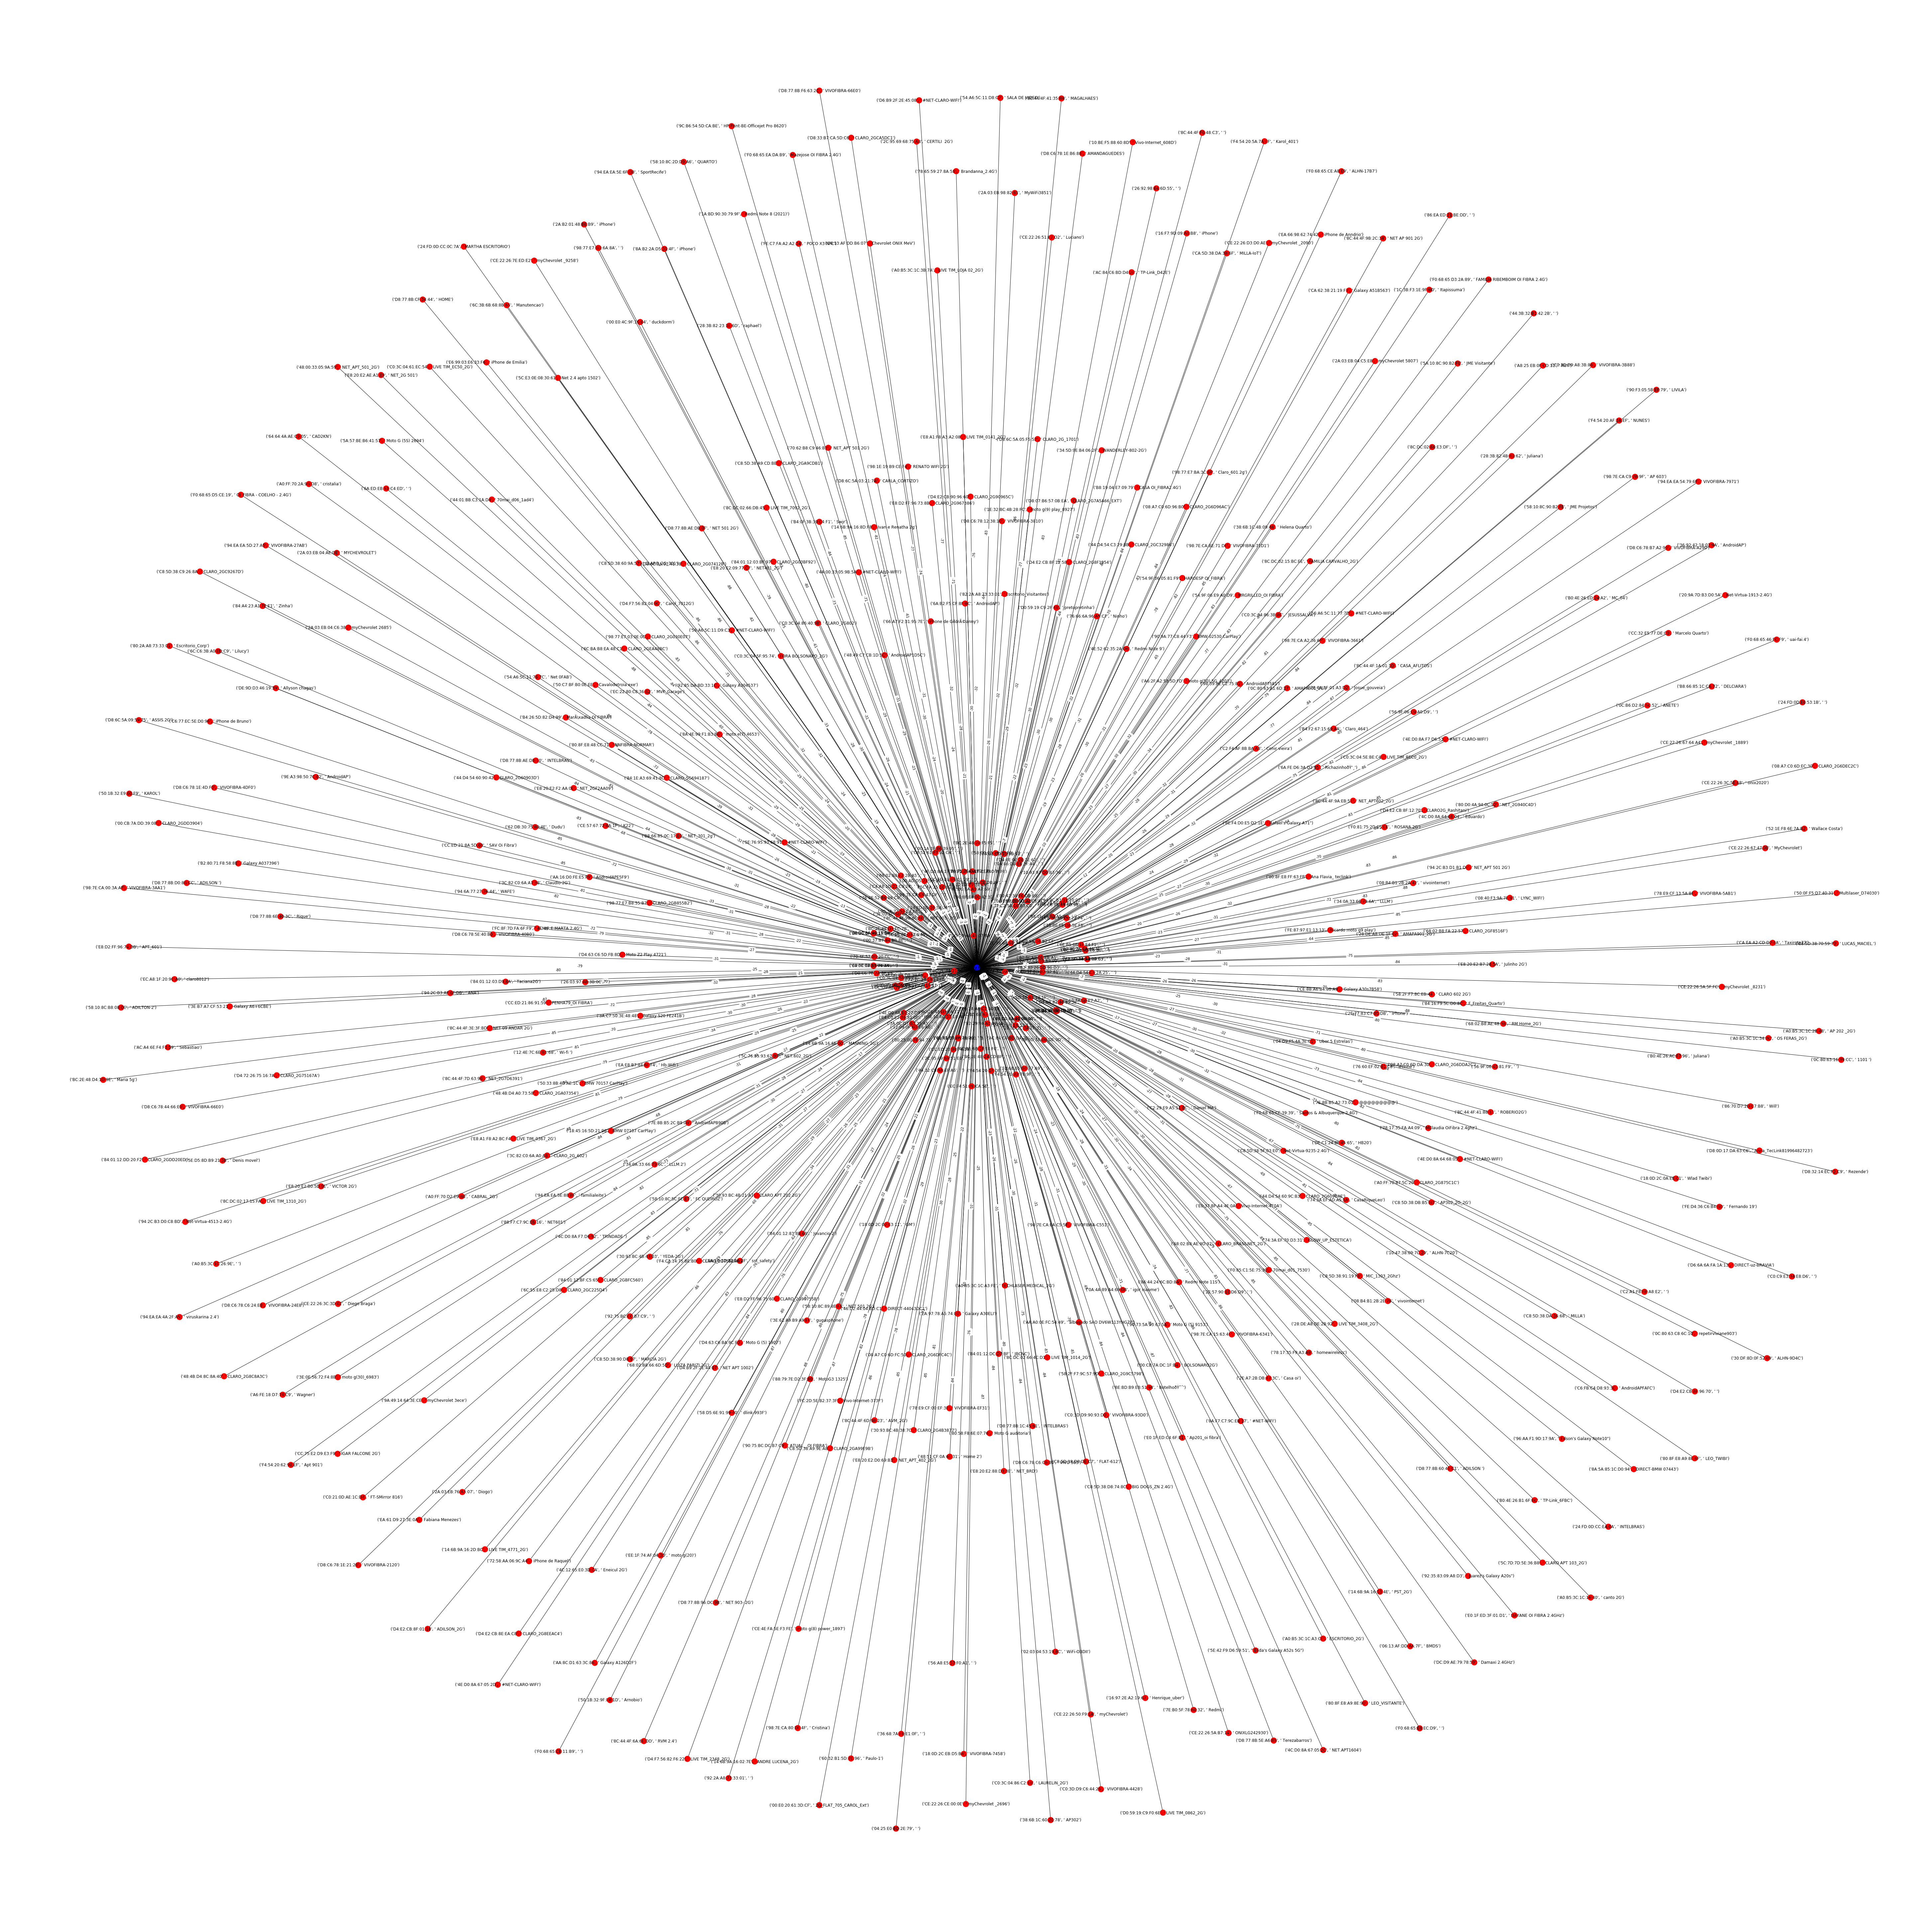

In [62]:
# Plotting using networkX

g = nx.Graph()
nodes = []
labelNodeDict = {}
nodeColor = []
for i in range(len(df)+1):
    if (i==0):
        nodes.append(i)
        labelNodeDict[i] = "My PC"
        nodeColor.append('blue')
    else:
        nodes.append(i)
        labelNodeDict[i] = (df.iloc[i-1,0],df.iloc[i-1,-2])
        nodeColor.append('red')
    
g.add_nodes_from(nodes)

edges = []
labelsEdgeDict = {}
for i in range(len(df)):
    edges.append((0, nodes[i+1], {'weight': (100/(int(df.iloc[i,8])*-1))}))
    labelsEdgeDict[(0,nodes[i+1])] = int(df.iloc[i,8])

g.add_edges_from(edges)

plt.figure(figsize=[80,80])
nx.draw(g, pos=nx.spring_layout(g), labels=labelNodeDict, node_color=nodeColor ,with_labels=True)
nx.draw_networkx_edge_labels(g, pos=nx.spring_layout(g), edge_labels=labelsEdgeDict)
plt.savefig("nx2.png")
print("Fig saved")